# Машинное обучение и нейронные сети

# Модель нейронной сети

## Синапс нейронной сети / слой нейронной сети

Синапс нейронной сети является аналогией синапса мозка. Сигнал, передающийся от других нейронов, аккумулируется с разным весом, и при достижении некоторого порога, генерирется выходной сигнал.

В нейронных сетях обработка сигнала с предыдущих нейронов осуществляется путём линейного преобразования над входными сигналами. За активацию нейрона отвечает некоторая нелинейная функция, именуемая "функция активации", выход которой и является выходом используемой модели нейрона.

**Слой** нейронной сети в большинстве случаев представляется комбинацией линейного преобразования и функии активации (в некоторых случаях слой может не иметь функции активации, или цеиком представлять собой нелинейное преобраование).

<img src="images/synaps.png" alt="Synaps" height=30% width=30%>

## Линейные операторы

* Полносвязный слой (матричное умножение)
* Свёрточный слой
* Слой усреднения по окну (частный случай сверточного оператора)

Далее представлен пример свёрточного слоя

$$O_{i, j} = f(K*I_{i-s:i+s, j-s:j+s})$$

$K$ - ядро свёртки  
$I$ - входной тезнор  
$I_{i-s:i+s, j-s:j+s}$ - срез тензора размера ядра свёртки с центром в точке (i, j)  
$O_{i, j}$ - результат свёртки (значение выходного тензора в точке (i, j))  
$f$ - функция активации

<img src="images/convolution.jpeg" alt="Synaps" height=30% width=30%>

## Функция активации

В качестве функций активации могут выступать практическю любые дифференцируемые функции (но нужно понимать, что не с каждой функцией активации оптимизация параметров нейронной сети может быть произведена успешно.

Наиболее популярными функциями активации являются:

* ReLU
* Sigmoid (сигмоида)
* tanh (гиперболическийй тангенс)

### ReLU (rectified linear unit)
$$
F(x) = max(0, x)
$$

<img src="images/relu.png" width=30% height=30% />

### Сигмоида
$$
F(x) = {1 \over 1 + e^{-x}}
$$

<img src="images/sigmoid.png" width=30% height=30% />

### Гиперболический тангенс
<img src="images/tanh.png" width=30% height=30% />

$$
F(x) = {e^{2x}-1 \over e^{2x}+1}
$$

## Нейронная сеть со скрытыми слоями

Практически во всех задачах, решаемых при помощи нейронных сетей, не достаточно одного слоя нейронной сети.
Один слой в описанном выше допущении одной функции активации не способен представить сложные зависимости, которые необходимы для решения задачи, для которой и обучается нейронная сеть.

Нейронная сеть может включать в себя большое количество нейронов, соелинённых между собой в некоторой последовательности.Промежуточные слои называются скрытыми слоями.

<img src="images/simple_neural_net.png" alt="Synaps" height=30% width=30%>
$$ H = f_1(W_1*I)$$
$$ O = f_2(W_2*H)$$

$W_1$ и $W_2$ - матрицы весов, обучаемые параметры  
$I$ - вектор входных признаков  
$O$ - вектор выхода  
$H$ - вектор скрытого состояния  
$f$ - функция активации

## Softmax слой

*Softmax* — это обобщение логистической функции для многомерного случая. Функция преобразует вектор z размерности K в вектор $\sigma$  той же размерности, где каждая координата $\sigma _{i}$ полученного вектора представлена вещественным числом в интервале [0,1] и сумма координат равна 1.

$$\sigma _{i} = {e^{z_i}\over\sum_{k=1}^Ke^{z_k}}$$

Функция Softmax применяется в машинном обучении для задач классификации, когда количество возможных классов больше двух (для двух классов используется логистическая функция). Координаты $\sigma_i$ полученного вектора при этом трактуются как вероятности того, что объект принадлежит к классу i.  
Часто Softmax используется для последнего слоя глубоких нейронных сетей для задач классификации.

## Нейронная сеть с softmax слоем
<img src="images/softmax.png" width=80% height=80% />

*Output Layer* возвращает вероятности принадлежности примера к каждому из 10 классов  
*Hidden Layer 2* возвращает вектор скрытых признаков

# Обучение нейронных сетей

## Типы обучения

* **С учителем** - для входных данных известно, какое предсказание должны выдавать обученная нами модель.
* **Без учителя** - конкретные значения выхода нейронной сети после обучения неизвестны (нейронная сеть сама учится группировать некоторые признаки)

## Классы задач

* **Классификация** - задача, в которой имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Примеры:
    * Задачи медицинской диагностики
    * Предсказание месторождений полезных ископаемых
    * Предсказание оттока клиентов
    * Оптическое распознавание символов
    * Обнаружение спама
    * Предсказание возраста
* **Регрессия** - задача, которая позволяет определить по известным характеристикам объекта значение некоторого его параметра. В отличие от задачи классификации значением параметра является не конечное множество классов, а множество действительных чисел. Примеры:
    * Восстановление зависимости переменных
    * Предсказание добычи
    * Предсказание возраста
* **Кластеризация** - задача, которая заключается в поиске независимых групп (кластеров) и их характеристик во всем множестве анализируемых данных. Решение этой задачи помогает лучше понять данные. Кроме того, группировка однородных объектов позволяет сократить их число, а следовательно, и облегчить анализ. Примеры:
    * Разбиение клиентов на целевые группы
    * Выделение групп людей на основе графа связей в социальных сетях
    * Повышение релевантности ответов на поисковые запросы путем группировки веб-сайтов по смысловым значениям поискового запроса
    * Кластеризация используется в сегментации изображений для определения границ и распознавания объектов

## Подготовка данных. Разметка.

Для задач, подразумевающих обучение с учителем требуется предварительная подготовка данных. Которая включает в себя как предобработку входных данных для нейронной сети, так и подготовка данных, которые будут использоваться в качестве заранее известного значения, к которому должно стремиться предсказание нейронной сети (GT - ground truth).

### Табличные данные

Табличные данные практически всегда требуют некоторой подготовки, и приведению их к некоторому унифицированному виду.

Типичные действия при подготовке табличных данных включают в себя:

* Исправление опечаток / ошибок в текстовых признаках (довольно частая проблема, когда производится набор текста)
* Обработка пропусков в данных (порой эти пропуски могут быть не критичны, и данные могут быть использованы для обучения модели)
* Приведение признаков к численному типу данных
* Генерация новых признаков, на основе комбинации уже имеющихся.

<img src="images/titanic.png" width=80% height=80% />

## Классификация изображений

Зада классификации изображений - задача присвоения изображению одной категории.

Если изображения являются синтетическими, т.е. сгенерированы каким-либо инструментом, то обычно заранее извество, что именно генерировалось на изображении, а значит для таким изображений категория известна заранее.

Для реальных данных категория заранее может быть не известна. В таком случае важной стадией подготовки данных является **разметка**.
Разметка данных для задач классификации является одной из сравнительно несложных. В этом процессе человек (или несколько людей) назначают для каждого изображения производит его анализ и назначает ему класс.

> Стоит отметить, что анализ изображений может производиться и другой обученной нейронной сетью, но на данном этапе на это не стоит отвлекаться.

## Задача детектирования

Детектирование - поиск области (часто прямоугольной), занимаемой некоторыми объектами.

В процессе разметки происходит поиск объектов, назначении этим объектам класса, и выделении прямоугольных областей, занимаемых этими объектами.

<img src="images/detect.jpg" width=80% height=80% />

## Задача сегментации

Сегментация является наболее сложной задачей для получения разметки, так как вместо ограничивающих прямоугольных областей требуется задать контур объекта (что для некоторых объектов может быть крайне трудозатратно).

Альтернативным вариантом может быть закрашивание областей на изображении, занимаемых тем или иным объектом на изображении.

Для подобной разметки часто требуется специальное программное обеспечение, позволяющее ускорить процесс выделения объектов.

<img src="images/segment.jpg" width=80% height=80% />

## Процесс обучения

Процесс обучения состоит из следующих шагов:

1. Получение из датасета некоторой партии объектов (далее batch, батч), а также GT (ground truth) для них.
2. Подача объектов на вход нейронной сети и получение предсказания модели (Prediction / Pred.).
3. Вычисление ошибки между Pred. и  GT при помощи функции ошибки loss_func (loss function).
4. Распространение ошибки по сети (подробно рассмотрим в следующем уроке)
5. Обновление параметров (весов) модели на основе распространённой ошибки.
6. Если прошло достаточное количество итераций, или ошибка предсказания стала меньше некоторого значения, заверщаем обучение, иначе возвращаемся к пункту 1.

В ходе обучения может возникнуть ситуация, что сеть функция ошибки более не уменьшается, но качество предсказания модели плохое. Возможна и другая ситуация, при которой сеть при довольно низком значении функции ошибки, имеет низкое качество предсказаний.

<img src="images/Overfitting.curve.png" width=30% height=30% />

### Недообучение / Переобучение

**Недообучение** — нежелательное явление, возникающее при решении задач обучения по прецедентам, когда алгоритм обучения не обеспечивает достаточно малой величины средней ошибки на обучающей выборке. Недообучение возникает при использовании недостаточно сложных моделей.

**Переобучение** (overtraining, overfitting) — нежелательное явление, возникающее при решении задач обучения по прецедентам, когда вероятность ошибки обученного алгоритма на объектах тестовой выборки оказывается существенно выше, чем средняя ошибка на обучающей выборке. Переобучение возникает при использовании избыточно сложных моделей.

<img src="images/Overfitting.svg.png" width=80% height=80% />

### Возможные решения при переобучении:
* Увеличение количества данных в наборе;
* Уменьшение количества параметров модели (количество параметров модели (весов) была в 2 - 3 раза меньше числа примеров обучающего множества);
* Добавление регуляризации / увеличение коэффициента регуляризации.

### Возможные решения при недообучении:
* Добавление новых параметров модели;
* Использование для описания модели функций с более высокой степенью;
* Уменьшение коэффициента регуляризации.

## Аугментация данных

**Аугментация данных** (data augmentation) – это методика создания дополнительных обучающих данных из имеющихся данных. Для достижения хороших результатов глубокие сети должны обучаться на очень большом объеме данных. Следовательно, если исходный обучающий набор содержит ограниченное количество изображений, необходимо выполнить аугментацию, чтобы улучшить результаты модели.

Примеры аугментаций при работе с изображениями:

* Геометрические (афинные, проективные, ...);
* Яркостные/цветовые;
* Замена фона;
* Искажения, характерные для решаемой задачи: блики, шумы, размытие и т. д.

### Отражение
<img src="images/aug_flip.jpeg" width=60% height=60% />

### Поворот
<img src="images/aug_rot.jpeg" width=60% height=60% />

### Случайное образание
<img src="images/aug_crop.jpeg" width=60% height=60% />

### Шумы
<img src="images/aug_noises.png" width=60% height=60% />

### Аугментация с помощью GAN (Generative adversarial network - Генеративно-состязательная сеть)
<img src="images/aug_noises.png" width=60% height=60% />

## Дообучение

Ещё одним подходом при обучении моделей является дообучение. Данный подход подразумевает, что у вас имеется обученная на некотором датасете модель (при этом нет никаких ограничений на то, на каком именно датасете обучалась модель, и какую задачу она решала). Интуиция, стоящая за подобным подходом, заключается в том, что уже обученная модель умеет извлекать какие-то признаки из входных данных. Соответственно ей может быть проще обучиться на новых данных.

Во многих задачах данный подход показал себя достаточно действенным, значительно сократив время обучения моделей, порой позволяя увеличить качество предсказаний результирующей модели.

<img src="images/finetuning_1.png" width=60% height=60% />

# Инструменты для работы с данными

## Генераторы в Python
Генераторы и итераторы представляют собой инструменты, которые, как правило, используются для поточной обработки данных.   
  
Итератор представляет собой объект перечислитель, который для данного объекта выдает следующий элемент, либо бросает исключение, если элементов больше нет.

## Создание итератора

In [1]:
# Из списка
it = iter([1, 2, 5, 3])
print(it)
# Перечисление циклом for
for i in it:
    print(i)

1
2
5
3


In [2]:
# Перечисление с помощью функции next
it = iter([1, 2, 5, 3])
while True:
    print(next(it))

1
2
5
3


StopIteration: 

In [3]:
# Создание в функции
def fun_iter(val):
    s = 1
    while True:
        s = s * val
        yield s
        
fit = fun_iter(2)
for i in range(4):
    print(next(fit))

2
4
8
16


## Библиотека OpenCV

<img src="images/opencv.png" width=15% height=15% />

**OpenCV** (Open Source Computer Vision Library) — библиотека алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения с открытым кодом. Реализована на C/C++, также разрабатывается для Python, Java, Ruby, Matlab, Lua и других языков

(256, 256, 3)


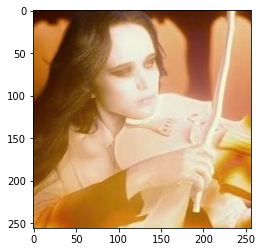

In [2]:
# shift + tab - справка!!!
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Чтение картинки (чтение происходит в цветовой модели BGR!)
# img_bgr = cv2.imread('data/Lenna.png')
img_bgr = cv2.imread('data/Vanya.jpg') # папаметр, который не представлен здесь(то как мы читаем картинку 3 канальную): cv2.IMREAD_GRAYSCALE/ cv2.IMREAD_COLOR
print(img_bgr.shape)
plt.imshow(img_bgr, cmap='gray') # сюда тоже тогда надо дописать cmap='gray'
plt.show()

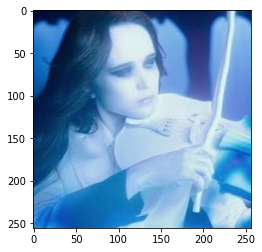

In [3]:
# Для перевода в RGB можно либо воспользоваться функцией opencv, либо инвертировать каналы
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # конвертация цвета
img = img_bgr[:, :, ::-1]  # Каналы - третье измерение изображения
# две верхние строчки - одно и то же 
plt.imshow(img)
plt.show()

(256, 256)


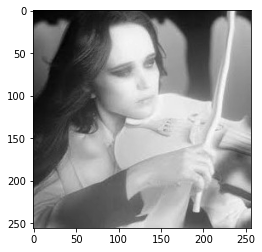

In [4]:
# Есть возможность сразу читать в цветовой модели Grayscale
img_gray = cv2.imread('data/Vanya.jpg', 0)
print(img_gray.shape)
plt.imshow(img_gray, cmap='gray')
plt.show()

## Преобразования изображений

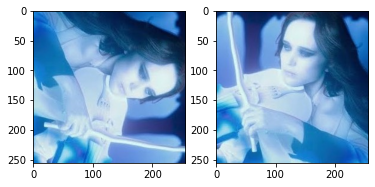

In [5]:
# Поворот изображения на 90 градусов
img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
# Отражение по горизонтали (0 - по вертикали)
img_flip = cv2.flip(img, 1)
plt.subplot(1, 2, 1)
plt.imshow(img_rot)
plt.subplot(1, 2, 2)
plt.imshow(img_flip)
plt.show()

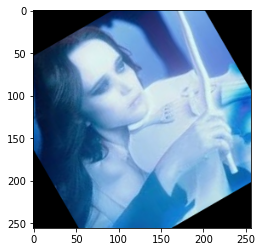

In [6]:
# Поворот на произвольный угол с помощью афинных преобразований
M = cv2.getRotationMatrix2D((128, 128), 30, 1)  # Указывается центр, угол поворота, масштаб
img_rot = cv2.warpAffine(img, M, (256, 256))
plt.imshow(img_rot)
plt.show()

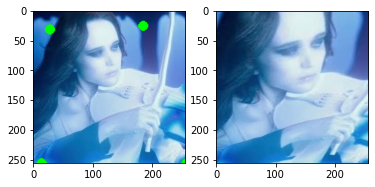

In [7]:
# Изменение перспективы
# pts1 = np.float32([[56, 65],[368, 52],[28, 512],[412, 512]])
# pts2 = np.float32([[0, 0], [512, 0], [0, 512], [512, 512]])
pts1 = np.float32([[ 28. ,  32.5],
                   [184. ,  26. ],
                   [ 14. , 256. ],
                   [256. , 256. ]])
pts2 = np.float32([[0, 0], [256, 0], [0, 256], [256, 256]]) # конечные точки 

M = cv2.getPerspectiveTransform(pts1,pts2) # получаем матрицу

img_persp = cv2.warpPerspective(img, M, (256, 256)) # применяем матрицу

# Нарисуем исходные точки (изменяет исходное изображение)
img_copy = img.copy()
for pt in pts1:
    cv2.circle(img_copy, tuple(pt.astype(int)), 4, (0, 255, 0), 8)

plt.subplot(1, 2, 1)
plt.imshow(img_copy)
plt.subplot(1, 2, 2)
plt.imshow(img_persp)
plt.show()

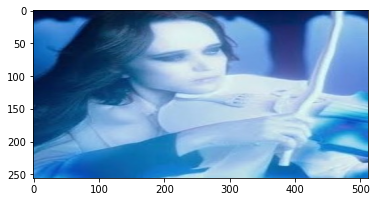

In [8]:
# Изменение размера
img_sc = cv2.resize(img, (512, 256)) # аргументы указываются в другом порядке (ширина, высота)
plt.imshow(img_sc)
plt.show()

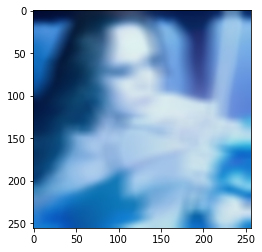

In [30]:
# Размытие
import random
kernel = (random.randint(0,32), random.randint(0,32))
img_bl = cv2.blur(img, kernel)
plt.imshow(img_bl)
plt.show()

# Задания

1. Скачать датасет [Nails segmentation](https://www.kaggle.com/vpapenko/nails-segmentation#1eecab90-1a92-43a7-b952-0204384e1fae.jpg). Составить список из пар (<имя изображения>, <маска>) для всех данных, используя функцию os.listdir() или glob.glob().  
2. Создать генератор, который на каждой итерации возвращает пару списков из заданного количества (аргумент функции) изображений и масок к ним (итератор должен перемешивать примеры).  
3. Добавить в генератор случайную аугментацию (каждая применяется случайно). После преобразований все изображения должны иметь одинаковый размер. *Обратите внимание, что большинство преобразований должны применяться одинаково к изображению и маске*
    1. Поворот на случайный угол
    2. Отражение по вертикали, горизонтали
    3. Вырезание части изображения
    4. Размытие  
   